# Carico le ricette

In [76]:
import pickle

with open('tasty_ingredients.pkl', 'rb') as handle:
    tasty_ingredients = pickle.load(handle)

with open('giallo_ingredients.pkl', 'rb') as handle:
    giallo_ingredients = pickle.load(handle)  

## Parole univoche

In [77]:
import re
regex = re.compile('[^a-zA-Z ]')
words = set()

for recipe in tasty_ingredients + giallo_ingredients:
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        ingredient_words = ingredient.split()
        for w in ingredient_words:
            words.add(w.lower())

print(f"Abbiamo {len(words)} parole univoche")
#print(words)     

Abbiamo 2200 parole univoche


# Lista di ingredienti trovata online

In [78]:
import json

with open('ingredients.json', 'rb') as handle:
    ingredients_list = json.load(handle)  
    
ingredients_list = [ingredient["name"].lower() for ingredient in ingredients_list["tags"] if len(ingredient["name"].lower()) > 2]

ingredients_list = np.array(ingredients_list)
len(ingredients_list)

9932

# Sociomatrice

In [79]:
import numpy as np
regex = re.compile('[^a-zA-Z ]')
import itertools

socio_giallo = np.zeros((len(ingredients_list),len(ingredients_list)))
socio_tasty = np.zeros((len(ingredients_list),len(ingredients_list)))

for recipe in tasty_ingredients:
    ingredients_in_recipe = set()
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        for w in ingredients_list:
            if w in ingredient:
                ingredients_in_recipe.add(w)
    for subset in itertools.combinations(ingredients_in_recipe, 2):
        i = np.argwhere(subset[0] == ingredients_list)
        j = np.argwhere(subset[1] == ingredients_list)
        socio_tasty[i, j] += 1
        socio_tasty[j, i] += 1
    
for recipe in giallo_ingredients:
    ingredients_in_recipe = set()
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        for w in ingredients_list:
            if w in ingredient:
                ingredients_in_recipe.add(w)
    for subset in itertools.combinations(ingredients_in_recipe, 2):
        i = np.argwhere(subset[0] == ingredients_list)
        j = np.argwhere(subset[1] == ingredients_list)
        socio_giallo[i, j] += 1
        socio_giallo[j, i] += 1

In [80]:
idxs = np.argwhere(np.all(socio_giallo == 0, axis=0))
socio_giallo = np.delete(socio_giallo, idxs, axis=0)
socio_giallo = np.delete(socio_giallo, idxs, axis=1)
giallo_ingredients = ingredients_list[idxs]

idxs = np.argwhere(np.all(socio_tasty == 0, axis=0))
socio_tasty = np.delete(socio_tasty, idxs, axis=0)
socio_tasty = np.delete(socio_tasty, idxs, axis=1)
tasty_ingredients = ingredients_list[idxs]

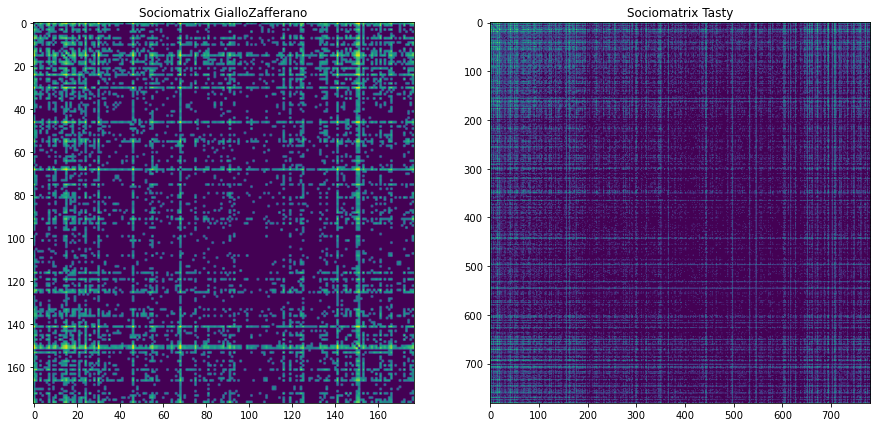

In [81]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2, figsize = (15,10))
ax[0].imshow(np.log(socio_giallo + 0.01))
ax[0].set_title("Sociomatrix GialloZafferano")

ax[1].imshow(np.log(socio_tasty + 0.01))
ax[1].set_title("Sociomatrix Tasty")

plt.show()